### Notebook to generate Supp Figure 4C

In [1]:
## import statement

import matplotlib
from matplotlib import pyplot as plt
import seaborn
import scanpy
import pandas
from typing import Tuple, Any, List, Union
import numpy as np
import torch
import os
from anndata import read_h5ad
from scanpy import pp
import pandas as pd
import umap
import scanpy as sc
import random
import pickle

# tissue_purifier import
import tissue_purifier as tp

In [2]:
from tissue_purifier.genex.gene_utils import *
from tissue_purifier.genex.poisson_glm import *
from tissue_purifier.utils import *
from tissue_purifier.plots import *

In [3]:
## set seeds
r_seed=t_seed=n_seed=100

random.seed(r_seed)
torch.manual_seed(t_seed)
np.random.seed(n_seed)



In [4]:
## plotting parameters

linewidth = 5
tickfontsize = 70
labelfontsize = 70
labelpad = 40
titlefontsize=70
legendfontsize=70

In [5]:
## Set working directory

import os
os.chdir("/home/skambha6/chenlab/tissue_purifier/TissueMosaic_Figures/Supp_Figure4/plots")

In [6]:
models = ["ncv_k10", "ncv_k25", "ncv_k50", "ncv_k100", "ncv_k500", "vae", "dino", "simclr", "barlow"]

ncv_results_dir = "/home/skambha6/chenlab/tissue_purifier/tp_output/testis/gr_output/ncv"
dino_results_dir = "/home/skambha6/chenlab/tissue_purifier/tp_output/testis/gr_output/dino"

In [7]:
import seaborn as sns
colors = sns.color_palette("deep", 10).as_hex()

ES
ncv_k10_reg_0.001_filter_ctype
-0.018666119920953645
ncv_k25_reg_0.001_filter_ctype
-0.0212610160916718
ncv_k50_reg_0.001_filter_ctype
-0.022826095860727022
ncv_k100_reg_0.001_filter_ctype
-0.023769632637866415
ncv_k500_reg_0.001_filter_ctype
-0.022299409314083408
vae_filter_2.0_ctype
-0.023698866759294033
dino_filter_2.0_ctype
-0.04192292425649164
simclr_filter_2.0_ctype
-0.03283697213189659
barlow_filter_2.0_ctype
-0.03542899932127431


/tmp/ipykernel_623616/2464323186.py:141: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs_1.set_xticklabels(["k10", "k25", "k50", "k100", "k500", "VAE", "DINO", "SimCLR", "Barlow"], fontsize=tickfontsize)


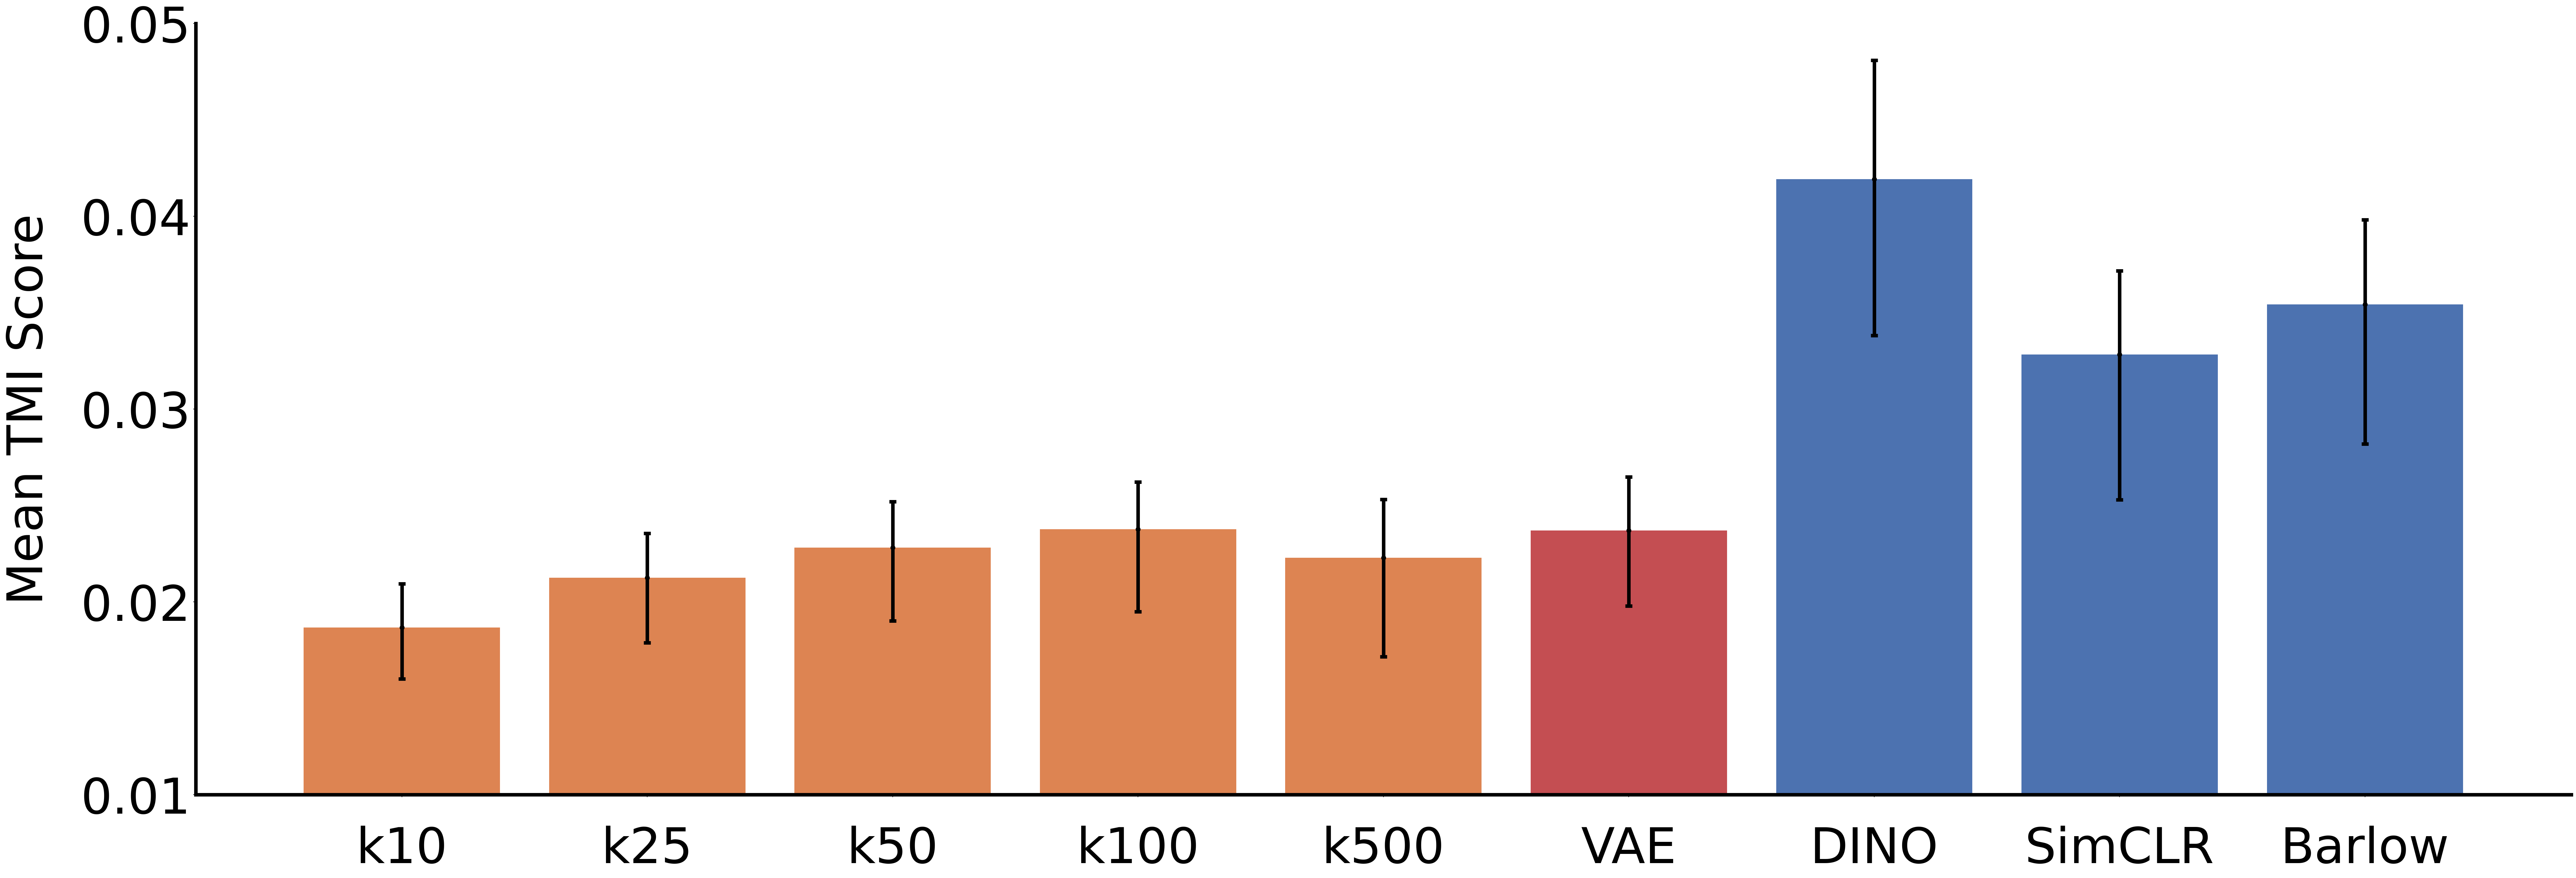

In [27]:
## gridspec

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import scanpy as sc

# Set vector-friendly plotting parameters
sc.set_figure_params(vector_friendly=True, dpi=300)

sc.set_figure_params(fontsize=legendfontsize)

# Now, when you create plots with Scanpy, they will be optimized for vector formats.

s = 100

# Create a figure
fig, axs_1 = plt.subplots(figsize=(60, 20))



cell_types = ["ES"]
cell_type_names = ["Elongated Spermatids"]

rel_q_gk_ctypes = []

## assuming 1 cell type (ES cells here)
rel_q_gk_kfold_ctypes = np.zeros((4,len(models)))

for i,ctype in enumerate(cell_types):
    
    print(ctype)
    
    model_rel_q_scores = []

    
    
    for model,j in zip(models,range(len(models))):
        
        if "ncv" in model:
            results_dir = ncv_results_dir
        elif "dino" in model:
            results_dir = dino_results_dir

        # out_prefix = prefixes[j]

        if "ncv" in model:
            results_dir = "/home/skambha6/chenlab/tissue_purifier/tp_output/testis/gr_output/ncv/"
        else:
             results_dir = "/home/skambha6/chenlab/tissue_purifier/tp_output/testis/gr_output/" + model


        if "ncv" in model:
            reg = 0.001
            out_prefix = model + f'_reg_{reg}_filter_ctype'
        else:
            out_prefix = model + "_filter_2.0_ctype"
            
        

        print(out_prefix)
        
        rel_q_gk_outfile_name = out_prefix + '_' + ctype + f"_df_rel_q_gk_ssl.pickle"
        rel_q_gk_outfile = os.path.join(results_dir, rel_q_gk_outfile_name)
        rel_q_gk = pickle.load(open(rel_q_gk_outfile, 'rb'))
        
        rel_q_gk_ctypes.append(rel_q_gk)

        baseline_rel_q_gk_outfile_name = out_prefix + '_' + ctype + f"_df_rel_q_gk_baseline.pickle"
        baseline_rel_q_gk_outfile = os.path.join(results_dir, baseline_rel_q_gk_outfile_name)
        baseline_rel_q_gk = pickle.load(open(baseline_rel_q_gk_outfile, 'rb'))

        for kfold in range(1,5):
            pred_counts_ng_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_pred_counts_ng.pickle"
            pred_counts_ng_outfile = os.path.join(results_dir, pred_counts_ng_outfile_name)
            pred_counts_ng= pickle.load(open(pred_counts_ng_outfile, 'rb'))


            pred_counts_ng_baseline_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_pred_counts_ng_baseline.pickle"
            pred_counts_ng_baseline_outfile = os.path.join(results_dir, pred_counts_ng_baseline_outfile_name)
            pred_counts_ng_baseline = pickle.load(open(pred_counts_ng_baseline_outfile, 'rb'))


            counts_ng_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_counts_ng.pickle"
            counts_ng_outfile = os.path.join(results_dir, counts_ng_outfile_name)
            counts_ng= pickle.load(open(counts_ng_outfile, 'rb'))

            cell_type_ids_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_cell_type_ids.pickle"
            cell_type_ids_outfile = os.path.join(results_dir, cell_type_ids_outfile_name)
            cell_type_ids = pickle.load(open(cell_type_ids_outfile, 'rb'))

            gene_names_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_gene_names.pickle"
            gene_names_outfile = os.path.join(results_dir, gene_names_outfile_name)
            gene_names = pickle.load(open(gene_names_outfile, 'rb'))




            df_d_sq_gk, df_rel_q_gk = GeneRegression.compute_eval_metrics(pred_counts_ng, counts_ng, cell_type_ids, gene_names, pred_counts_ng_baseline)

            rel_q_gk_kfold_ctypes[kfold-1,j] = -1*np.mean(df_rel_q_gk[0])


        print(np.mean(rel_q_gk[0]))
        
        model_rel_q_scores.append(-1*np.mean(rel_q_gk[0]))
    


    from scipy.stats import bootstrap

    # Compute the bootstrap confidence intervals
    means = np.mean(rel_q_gk_kfold_ctypes, axis=0)
    conf_intervals = []

    confidence_level = 0.95

    for i in range(rel_q_gk_kfold_ctypes.shape[1]):
        res = bootstrap((rel_q_gk_kfold_ctypes[:,i],), np.mean, confidence_level=confidence_level, n_resamples=10000, method='percentile')
        conf_intervals.append(res.confidence_interval)

    # Extract lower and upper bounds of the confidence intervals
    lower_bounds = [ci.low for ci in conf_intervals]
    upper_bounds = [ci.high for ci in conf_intervals]

    # Compute the error bars (distance from the mean to the bounds)
    yerr_lower = means - np.array(lower_bounds)
    yerr_upper = np.array(upper_bounds) - means
    yerr = [yerr_lower, yerr_upper]

    import scipy
    # sem = scipy.stats.sem(rel_q_gk_kfold_ctypes, axis=0) 
    axs_1.bar(["ncv_k10", "ncv_k25", "ncv_k50", "ncv_k100", "ncv_k500", "vae", "dino", "simclr", "barlow"], model_rel_q_scores, color=[colors[1], colors[1], colors[1], colors[1], colors[1], colors[3], colors[0], colors[0], colors[0]])
    #color=['goldenrod', 'goldenrod', 'goldenrod', 'goldenrod', 'goldenrod', 'tab:orange', 'tab:blue', 'tab:blue', 'tab:blue'])
    # axs_1.set_title(cell_type_names[i], fontsize=20,pad=20)
    axs_1.errorbar(["ncv_k10", "ncv_k25", "ncv_k50", "ncv_k100", "ncv_k500", "vae", "dino", "simclr", "barlow"], model_rel_q_scores, yerr=yerr, fmt='o', color='black', ecolor='black', elinewidth=linewidth, capsize=linewidth, capthick=linewidth)
    axs_1.set_ylabel('Mean TMI Score', fontsize=labelfontsize, labelpad=labelpad)
    axs_1.set_ylim(0.01, 0.05)
    axs_1.tick_params(axis='y', labelsize=tickfontsize)
    axs_1.set_yticks([0.01, 0.02, 0.03, 0.04, 0.05])
    axs_1.set_xticklabels(["k10", "k25", "k50", "k100", "k500", "VAE", "DINO", "SimCLR", "Barlow"], fontsize=tickfontsize)
    axs_1.tick_params(axis='x', which='major', pad=labelpad)
    axs_1.spines['bottom'].set_linewidth(linewidth)
    axs_1.spines['left'].set_linewidth(linewidth)
    axs_1.spines['top'].set_visible(False)
    axs_1.spines['right'].set_visible(False)   
    axs_1.grid(False)


plt.subplots_adjust(wspace=0.5)
fig.savefig('Supp_Figure_4c.pdf', transparent=True, bbox_inches='tight', dpi=300)

